In [1]:
# delay descrimination task: training failed

from psychrnn.tasks.delayed_discrim import DelayedDiscrimination
from psychrnn.backend.models.basic import Basic

from psychrnn.backend.dlpfc.loss import rt_mask_mse_06, rt_mask_mse_07, rt_mask_mse_08
from tqdm import tqdm
import numpy as np
import pandas as pd

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
experiment = 'interactive'
name = 'basic'
dt = 10
tau = 50
T = 6000
N_batch = 50
N_rec = 100
N_in = 2
N_out = 2

In [3]:
task = DelayedDiscrimination(dt=dt, tau=tau, T=T, N_batch=N_batch, 
                        onset_time = 500, stim_duration_1 = 1000, delay_duration = 400, stim_duration_2 = 1000, decision_duration = 2000)

In [4]:
params = task.get_task_params()
params

{'N_batch': 50,
 'N_in': 2,
 'N_out': 2,
 'dt': 10,
 'tau': 50,
 'T': 6000,
 'alpha': 0.2,
 'N_steps': 600,
 'onset_time': 500,
 'stim_duration_1': 1000,
 'delay_duration': 400,
 'stim_duration_2': 1000,
 'decision_duration': 2000,
 'frequency_pairs': [(18, 10), (22, 14), (26, 18), (30, 22), (34, 26)],
 'decision_options': ['>', '<'],
 'lo': 0.2,
 'hi': 1.0}

In [5]:
[x, y, mask, allParams] = task.get_trial_batch()


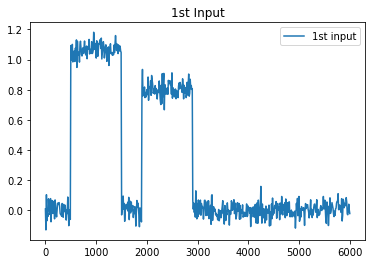

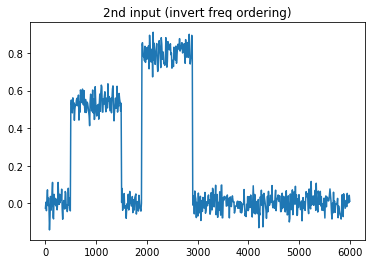

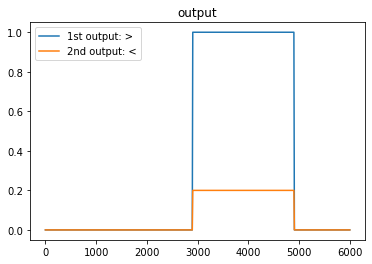

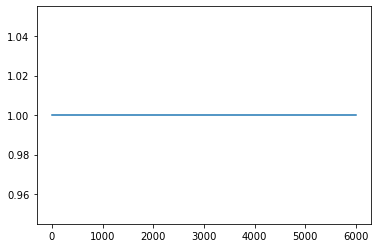

In [6]:

trialNum = 1
# x[0]: targets.: 0 represents targets are off; 1 represents on
# x[1]: color: -1: total green 1: total red
trialIn = x[trialNum,:,:]
trialOut = y[trialNum,:,:]
trialMask = mask[trialNum,:,:]
time = np.linspace(0, task.T, int(task.T/task.dt))
# plot target configuration (-1: red 1: green)
plt.figure()
plt.plot(time, trialIn[:,0], label = '1st input')
plt.legend()
plt.title("1st Input")

# plot input coherence (positive: red negative: green)
plt.figure()
plt.plot(time, trialIn[:,1])
plt.title("2nd input (invert freq ordering)")

# plot output to the model 

plt.figure()
plt.plot(time, trialOut[:,0], label = '1st output: >')
plt.plot(time, trialOut[:,1], label = '2nd output: <')
plt.legend()
plt.title("output")

# # plot trial masks
plt.figure()
plt.plot(time, trialMask[:,0])

plt.show()




In [7]:
print(allParams[trialNum])

{'stimulus_1': 500, 'delay': 1500, 'stimulus_2': 1900, 'decision': 2900, 'end': 4900, 'stim_noise': 0.1, 'f1': 30, 'f2': 22, 'choice': 0}


# Set Network params

In [8]:
network_params = task.get_task_params()
network_params['name'] = name
network_params['N_rec'] = N_rec
network_params['rec_noise'] = 0.2

network_params["transfer_function"] = tf.nn.tanh


# network_params["loss_function"] = "rt_mask_mse"
# network_params["rt_mask_mse"] = rt_mask_mse_07


network_params['loss_function'] = "mean_squared_error"


# add a dale's ratio 
network_params['dale_ratio'] = .8



In [9]:
try:
    model.destruct()
except:
    pass

model = Basic(network_params)

model.decision_threshold = network_params.get("decision_threshold", np.inf)

In [10]:
# check model
vars(model)


{'params': {'N_batch': 50,
  'N_in': 2,
  'N_out': 2,
  'dt': 10,
  'tau': 50,
  'T': 6000,
  'alpha': 0.2,
  'N_steps': 600,
  'onset_time': 500,
  'stim_duration_1': 1000,
  'delay_duration': 400,
  'stim_duration_2': 1000,
  'decision_duration': 2000,
  'frequency_pairs': [(18, 10), (22, 14), (26, 18), (30, 22), (34, 26)],
  'decision_options': ['>', '<'],
  'lo': 0.2,
  'hi': 1.0,
  'name': 'basic',
  'N_rec': 100,
  'rec_noise': 0.2,
  'transfer_function': <function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>,
  'loss_function': 'mean_squared_error',
  'dale_ratio': 0.8},
 'name': 'basic',
 'N_in': 2,
 'N_rec': 100,
 'N_out': 2,
 'N_steps': 600,
 'dt': 10,
 'tau': 50,
 'N_batch': 50,
 'alpha': 0.2,
 'rec_noise': 0.2,
 'transfer_function': <function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>,
 'load_weights_path': None,
 'initializer': <psychrnn.backend.initializations.GaussianSpectralRadius at 0x1a10add3e08>,
 'dale_ratio': 0.8,
 'W_in_train': True,
 'W_rec_

# Set Training params & Train

In [11]:
trials = 10000
train_params = {}
train_params['save_weights_path'] =  "./delay_discrim"
train_params['training_iters'] = trials
train_params['learning_rate'] = .001
train_params['loss_epoch'] = 10
train_params['save_training_weights_epoch'] = 1000 / N_batch
train_params['training_weights_path'] = None




In [12]:
losses, initialTime, trainTime = model.train(task, train_params)
loss_name = "./checkerDelayTest.txt"
print("Save losses to " + loss_name)
with open(loss_name, 'w') as f:
    for item in losses:
        f.write("%s\n" % item)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Iter 500, Minibatch Loss= 0.450738
Iter 1000, Minibatch Loss= 0.338684
Iter 1500, Minibatch Loss= 0.277251
Iter 2000, Minibatch Loss= 0.241001
Iter 2500, Minibatch Loss= 0.218414
Iter 3000, Minibatch Loss= 0.201057
Iter 3500, Minibatch Loss= 0.188390
Iter 4000, Minibatch Loss= 0.183743
Iter 4500, Minibatch Loss= 0.176277
Iter 5000, Minibatch Loss= 0.170435
Iter 5500, Minibatch Loss= 0.162814
Iter 6000, Minibatch Loss= 0.159693
Iter 6500, Minibatch Loss= 0.155446
Iter 7000, Minibatch Loss= 0.151619
Iter 7500, Minibatch Loss= 0.149479
Iter 8000, Minibatch Loss= 0.141250
Iter 8500, Minibatch Loss= 0.138092
Iter 9000, Minibatch Loss= 0.130575
Iter 9500, Minibatch Loss= 0.125083
Optimization finished!
Model saved in file: ./delay_discrim
Save losses to ./checkerDelayTest.txt


# Test 5000 trials

In [13]:
trials =1000
batches = int(np.ceil(trials / N_batch))


rnn_state = np.zeros((trials, task.N_steps, model.N_rec))
rnn_out = np.zeros((trials, task.N_steps, model.N_out))

# needs to be finished
f1 = np.zeros((trials,1))
f2 = np.zeros((trials,1))
correct_choice = np.zeros((trials,1))


decision = np.zeros((trials,1))
rt = np.zeros((trials,1))


In [14]:
for b in tqdm(range(batches)):
    [x, y, mask, params] = task.get_trial_batch()
    outputs, states = model.test(x)
    
    start_index = N_batch * b
    end_index = N_batch * (b + 1)
    rnn_state[start_index:end_index] = states
    rnn_out[start_index:end_index] = outputs
    


    thr = np.where(outputs > 0.7)
    
    for i in range(N_batch):
        index = start_index + i
        

        
        f1[index] = params[i]["f1"]
        f2[index] = params[i]["f2"]
        correct_choice[index] = params[i]["choice"]

        ############ calculate RT and decision made 
#         thr_time = thr[1][thr[0]==i][0] if sum(thr[0]==i) > 0 else outputs.shape[1]
#         thr_unit = thr[2][thr[0]==i][0] if sum(thr[0]==i) > 0 else np.argmax(outputs[i, -1])
        
#         decision[index] = thr_unit
#         rt[index] = thr_time*task.dt - params[i]["decision"] 


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]


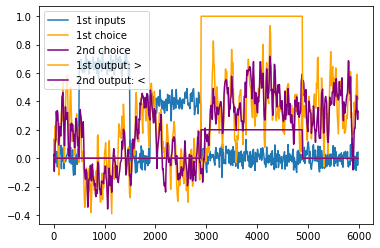

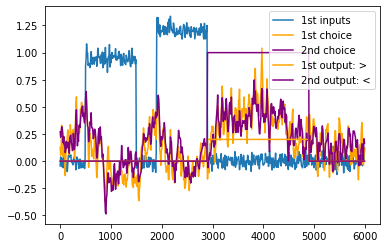

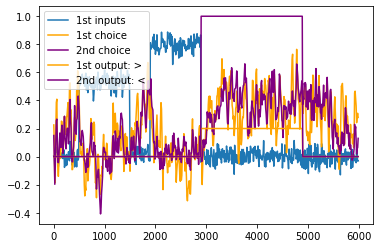

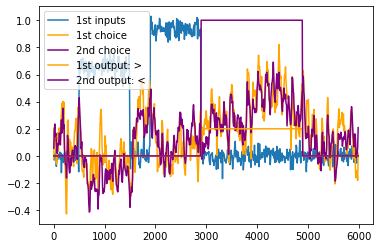

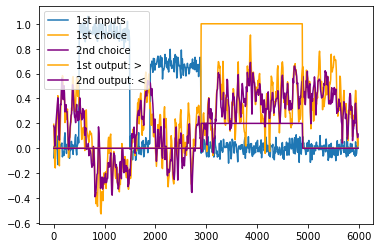

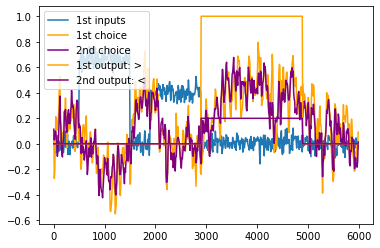

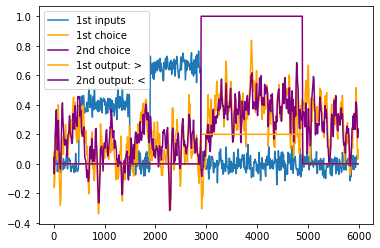

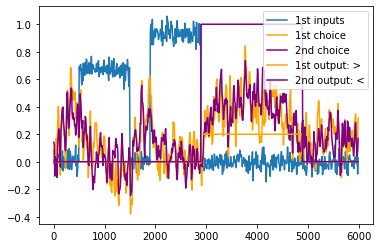

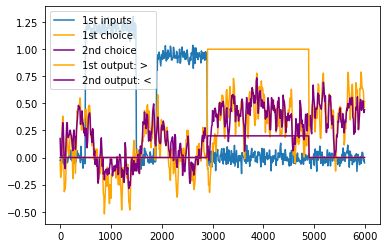

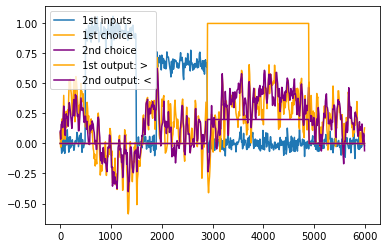

In [15]:
# plot example trials

# rts = rt[-N_batch:]
for i in range(0,10):
    plt.figure()
    plt.plot(np.arange(0, T, 10), x[i, :, 0], label = '1st inputs')

    plt.plot(np.arange(0, T, 10), outputs[i, :, 0], label = '1st choice', color = 'orange')
    plt.plot(np.arange(0, T, 10), outputs[i, :, 1], label = '2nd choice', color = 'purple')    
    plt.plot(np.arange(0, T, 10), y[i, :, 0], label = '1st output: >', color = 'orange')
    plt.plot(np.arange(0, T, 10), y[i, :, 1], label = '2nd output: <', color = 'purple')
    plt.legend()
    
#     plt.vlines(2900 + rts[i], 0, 1, color = 'k')


In [52]:

delay_df = pd.DataFrame({'trial' : np.arange(trials),
                           # the real coherence based on left and right (positive: left evidence dominant
                           # negative: right evidence dominant)
                           'f1' : f1[:,0],
                           'f2' : f2[:,0],
                           'decision' : decision[:,0],
                           'decision_time' : rt[:,0],
                           'correct_choice' : correct_choice[:,0]})



# print("Overall Accuracy: " + str(np.sum(delay_df["correct_decision"])/len(delay_df)))
# print("Negative RT trials ratio: ", end = "")
# print(np.sum(delay_df["decision_time"] < 0)/len(delay_df))



,trial,f1,f2,decision,decision_time,correct_choice
0,0,18.0,10.0,0.0,-2250.0,0.0
1,1,34.0,26.0,0.0,-1480.0,0.0
2,2,14.0,22.0,1.0,-2330.0,1.0
3,3,22.0,30.0,0.0,-1760.0,1.0
4,4,18.0,10.0,1.0,-1900.0,0.0
...,...,...,...,...,...,...
995,995,26.0,18.0,0.0,-1990.0,0.0
996,996,34.0,26.0,1.0,-1800.0,0.0
997,997,18.0,26.0,1.0,-1430.0,1.0
998,998,10.0,18.0,0.0,-2160.0,1.0


In [54]:
model.destruct()